<a href="https://colab.research.google.com/github/Sammy-Mutua/DSC-14-B-Week-4/blob/main/Samuel_Mutua_DSC14B_Week4_Independent_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.0  Defining the question

**a)** **Problem Statement**


From the dataset provided, a claim has been made concerning bluecars. 
The claim is that the number of bluecars taken from postal code 75015 is same as the number of cars taken from postal code 75017 during weekends. Through hypothesis testing, we will subject our data through some analysis so as to assert or reject this claim


**b) Metric of Success**

Prove beyond reasonable whether or not the the number of bluecars taken from postal code 75015 is same as the number of cars taken from postal code 75017 during weekends.

**C) Context**

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.
In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

**D) Experimental Design Analysis**

1. Defining the research
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Plot appropriate univariate and bivariate summaries recording our observations.
4. Implement the solution by performing hypothesis testing.
5. This will need to be documented when writing the report. 

**E) Relevance of the Data**

The dataset and glossary to use for this project can be found here http://bit.ly/DSCoreAutolibDataset and http://bit.ly/DSCoreAutolibDatasetGlossary respectively.
The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

## 2.0 Loading the Dataset

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.stats import weightstats as stests

In [3]:
autolib1 = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
autolib1

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## 3.0 Data Description

In [5]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [11]:
print("The shape of the dataset: ",autolib.shape)
# the dataset has 16,085 rows and 13 columns

The shape of the dataset:  (16085, 13)


In [12]:
# Removing whitespaces from the column names
autolib.columns = autolib.columns.str.lower().str.replace(' ', '_')


In [13]:
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [15]:
# checking for missing values
autolib.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

there are no missing values in the data as observed.

In [16]:
# Checking for Unique Values
print(autolib.nunique())

postal_code               104
date                      156
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64


In [17]:
# Checking for unique values in each column
for col in autolib.columns.to_list():
  print(f'{col} column unique values: \n')
  print(autolib[col].unique(), end='\n')
  print('**********')
  print('\n')

postal_code column unique values: 

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
**********


date column unique values: 

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/2

## 4.0 Exploratory Data Analysis

### I. Univariate Analysis

In [18]:
# Calculating the measures of Dispersion
autolib.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


**Analysis on our column of interest-  "bluecars_taken_sum"**

In [19]:
# Calculating Mode
autolib.bluecars_taken_sum.mode()


0    12
dtype: int64

In [20]:
# Calculating Median
autolib.bluecars_taken_sum.median()


46.0

In [21]:
# Calculating Mean
autolib.bluecars_taken_sum.mean()


125.92695057506994

In [22]:
# Determining the range between the minimum and the maximum value
maximum_value = autolib.bluecars_taken_sum.max()
minimum_value = autolib.bluecars_taken_sum.min()
range = maximum_value - minimum_value

print(range)

1352


In [23]:
# Finding the quartiles of our column pf interest
autolib.bluecars_taken_sum.quantile([0.25, 0.5, 0.75])


0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [24]:
# Calculating measures of Dispersion for our column of interest
print(" Standard Deviation: ",autolib.bluecars_taken_sum.std())
print(" Variance: ",autolib.bluecars_taken_sum.var())
print(" Kurtosis: ",autolib.bluecars_taken_sum.kurt())
print(" Skewness: ",autolib.bluecars_taken_sum.skew())

 Standard Deviation:  185.42657876727893
 Variance:  34383.01611333789
 Kurtosis:  6.172692305510042
 Skewness:  2.4063548974959086




*   There is an indication that our data is highly skewed
*   The distribution is Leptokurtic since the kurtosis is greater the 3 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


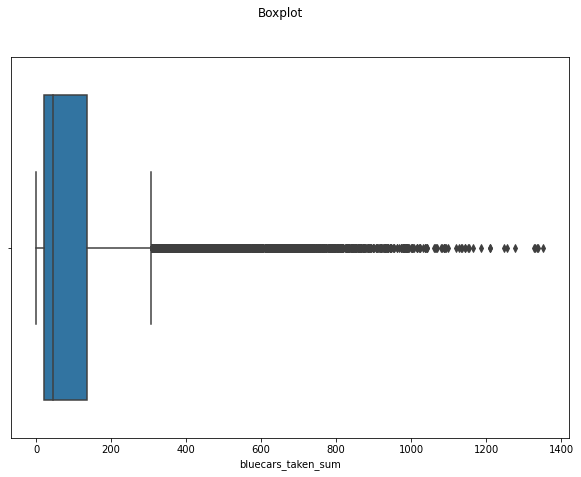

In [25]:
# Checking for outliers
fig, (ax1)= plt.subplots(figsize=(10, 7))
fig.suptitle('Boxplot')
sns.boxplot(autolib['bluecars_taken_sum'], ax=ax1)
plt.show()

As displayed, there seems to be a significant number of outliers in the entries in the column

In [26]:
# Calculating the total sum of outliers
Q1 = autolib.bluecars_taken_sum.quantile(0.25)
Q3 = autolib.bluecars_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib.bluecars_taken_sum < Q1 - 1.5 * IQR) | (autolib.bluecars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13870
True      2215
Name: bluecars_taken_sum, dtype: int64

There are 2215 entries beyond the threshold but  most of the detected outliers are non-error outliers and rightfully belong to the population of interest, thus keeeping them would be more viable

Text(0, 0.5, 'count')

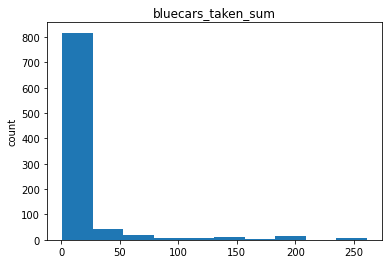

In [28]:
# A histogram displaying the column distribution
autolib['bluecars_taken_sum'].value_counts().plot(kind= 'hist')
plt.title("bluecars_taken_sum")
plt.ylabel("count")

As earlier established, our data is highly skewed

###II. Bivariate Analysis

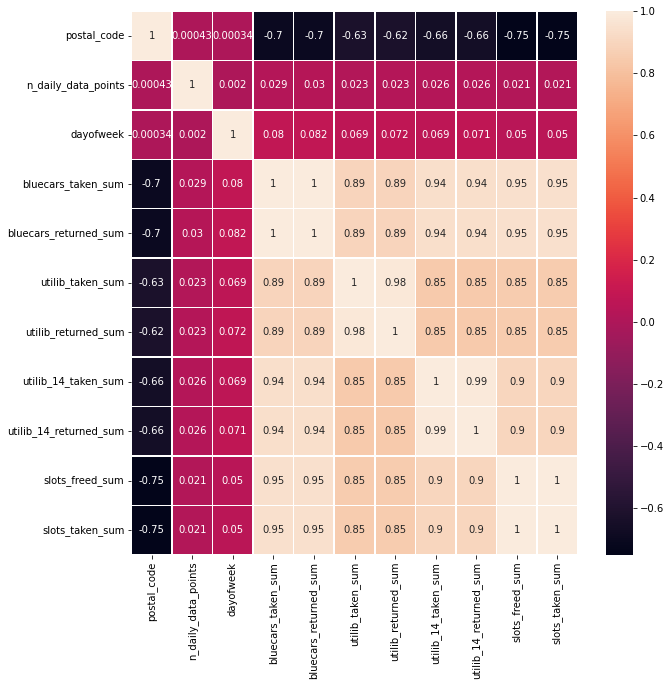

In [29]:
# Plotting a correlation Matrix
corrMatrix = autolib.corr()
corrMatrix


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)


Nearly 70% of the columns are closely related as they register a correlation of close to 1 with each other


## 5.0 Hypothesis Testing


Hypothesis testing (using a z-score).

A sample of 1000 values from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75015 is same as the number of bluecars taken postal code 75017 during weekends

μ1=μ2

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not same as the number of bluecars taken postal code 75017 during weekends

μ1≠μ2

**Sampling technique**

I chose to use Simple Random Sampling. Why? Random samples are the best method of selecting your sample from the population of interest. The advantages are that your sample represents the target population and eliminates sampling bias because each entry in the population has a fair shot at being chosen



In [44]:
#Select a sample from the autolib dataset using the Simple Random Sampling technique)
df = autolib.sample(n=1000,replace='False')
print(df)

       postal_code       date  n_daily_data_points  dayofweek day_type  \
8455         92370  2/16/2018                 1439          4  weekday   
4209         91370  6/18/2018                 1440          0  weekday   
4521         92000  6/19/2018                 1370          1  weekday   
13099        94000  5/27/2018                 1440          6  weekend   
10641        93170  2/28/2018                 1429          2  weekday   
...            ...        ...                  ...        ...      ...   
15135        94450   6/6/2018                 1440          2  weekday   
14934        94410  4/10/2018                 1440          1  weekday   
2466         75016  5/21/2018                 1440          0  weekday   
15491        94800  1/31/2018                 1440          2  weekday   
2737         75018  3/30/2018                 1434          4  weekday   

       bluecars_taken_sum  bluecars_returned_sum  utilib_taken_sum  \
8455                   32                

In [45]:
#Mean of the sample
df.bluecars_taken_sum.mean()

128.826

In [40]:
#Standard deviation of the sample
df.bluecars_taken_sum.std()


189.34069616229695

In [41]:
df1 = df[(df.postal_code == 75015) & (df.day_type == 'weekend')]
df1


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2336,75015,6/16/2018,1440,5,weekend,1209,1154,36,33,49,47,310,290
2218,75015,2/4/2018,1440,6,weekend,1043,1118,19,20,84,89,319,328


In [42]:
df2 = df[(df.postal_code == 75017) & (df.day_type == 'weekend')]
df2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2590,75017,4/8/2018,1440,6,weekend,936,975,31,30,63,55,224,228
2502,75017,1/7/2018,1440,6,weekend,795,846,11,13,38,40,200,206
2583,75017,4/1/2018,1440,6,weekend,713,738,12,11,55,55,178,174
2543,75017,2/17/2018,1440,5,weekend,862,887,11,14,45,43,253,255
2649,75017,6/17/2018,1440,6,weekend,729,775,21,20,43,50,163,166


In [54]:
# mean of bluecars taken columns from the tables above
df1.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,75015.0,1440.0,5.500000,1126.000000,1136.000000,27.500000,26.500000,66.500000,68.000000,314.500000,309.000000
std,0.0,0.0,0.707107,117.379726,25.455844,12.020815,9.192388,24.748737,29.698485,6.363961,26.870058
min,75015.0,1440.0,5.000000,1043.000000,1118.000000,19.000000,20.000000,49.000000,47.000000,310.000000,290.000000
25%,75015.0,1440.0,5.250000,1084.500000,1127.000000,23.250000,23.250000,57.750000,57.500000,312.250000,299.500000
50%,75015.0,1440.0,5.500000,1126.000000,1136.000000,27.500000,26.500000,66.500000,68.000000,314.500000,309.000000
75%,75015.0,1440.0,5.750000,1167.500000,1145.000000,31.750000,29.750000,75.250000,78.500000,316.750000,318.500000
max,75015.0,1440.0,6.000000,1209.000000,1154.000000,36.000000,33.000000,84.000000,89.000000,319.000000,328.000000


In [55]:
df2.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.00000,5.000000
mean,75017.0,1440.0,5.800000,807.000000,844.200000,17.200000,17.600000,48.800000,48.6000,203.60000,205.800000
std,0.0,0.0,0.447214,93.179933,93.555866,8.786353,7.700649,10.059821,6.8775,35.96248,37.110645
min,75017.0,1440.0,5.000000,713.000000,738.000000,11.000000,11.000000,38.000000,40.0000,163.00000,166.000000
25%,75017.0,1440.0,6.000000,729.000000,775.000000,11.000000,13.000000,43.000000,43.0000,178.00000,174.000000
50%,75017.0,1440.0,6.000000,795.000000,846.000000,12.000000,14.000000,45.000000,50.0000,200.00000,206.000000
75%,75017.0,1440.0,6.000000,862.000000,887.000000,21.000000,20.000000,55.000000,55.0000,224.00000,228.000000
max,75017.0,1440.0,6.000000,936.000000,975.000000,31.000000,30.000000,63.000000,55.0000,253.00000,255.000000


since n= 1000, we will use z test to get our test statistic
confidence interval = 0.05

In [53]:
# Z Test
from statsmodels.stats.weightstats import ztest as ztest
ztest(df1.bluecars_taken_sum, df2.bluecars_taken_sum, value=0)

(3.87097156175422, 0.00010840243921332647)

the test statistic is 3.87097156175422 and p-value is 0.00010840243921332647

The P value is less than the confidence interval of 0.05 and thus **we Reject** the **Null** hypothesis  (The number of Bluecars taken from postal code 75015 is same as the number of bluecars taken postal code 75017 during weekends) and we assert the **Alternative** hypothesis  (The number of Bluecars taken from postal code 75015 is not same as the number of bluecars taken postal code 75017 during weekends). 